In [6]:
from keras.datasets import cifar10
import numpy as np

np.random.seed(10)

In [7]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [8]:
print('train:', len(x_img_train))
print('test:', len(x_img_test))

train: 50000
test: 10000


#### 訓練資料是由images與labels所組成

In [9]:
x_img_train.shape

(50000, 32, 32, 3)

維度說明如下:
* 50000: 資料筆數
* 32, 32: 影像的大小是32x32
* 3: 影像為RGB三原色

In [10]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ..., 
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ..., 
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ..., 
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ..., 
       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ..., 
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ..., 
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ..., 
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67,

In [11]:
y_label_train.shape

(50000, 1)

y_label_train是圖形資料的真實值，每一個數字代表一種圖形類別名稱，共有10個類別:
0:airplane、1:autombile、2:bird、3:cat、4:deer、5:dog、6:frog、7:horse、8:ship、9:truck

# 查看多筆images與label

#### 定義label_dict字典

In [12]:
label_dict={0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [13]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        title = str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' + label_dict[labels[i][0]]
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()
        

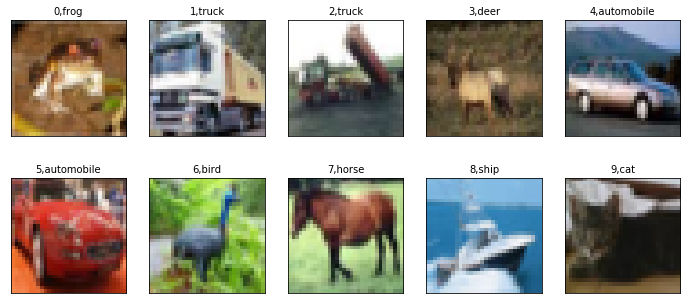

In [14]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

# 將images進行預處理

#### 將照片影像image的數字標準化

In [15]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

查看照片影像image的pixel標準化後的結果，全部的數值都在0與1之間。

In [16]:
x_img_train_normalize[0][0][0]

array([ 0.23137255,  0.24313726,  0.24705882], dtype=float32)

# 將label進行資料預處理
因為cifar-10資料集，我們希望預測的影像的類型，例如:「船」的影像的label是8，經過One-hot Encoding轉換維0000000010,10個數字正好對應到輸出層10個神經元。

In [17]:
y_label_train.shape

(50000, 1)

In [18]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### 將label標籤欄位轉換為Onehot encoding

In [19]:
from keras.utils import np_utils

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [20]:
y_label_train_OneHot.shape

(50000, 10)

In [21]:
y_label_train_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

# 建立模型

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [94]:
model = Sequential()

In [95]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))

In [96]:
model.add(Dropout(0.25))

In [97]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [98]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

In [99]:
model.add(Dropout(0.25))

In [100]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [101]:
model.add(Flatten())

In [102]:
model.add(Dropout(0.25))

In [103]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [104]:
model.add(Dense(10, activation='softmax'))

In [105]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 120s 3ms/step - loss: 1.5823 - acc: 0.4327 - val_loss: 1.4228 - val_acc: 0.5107
Epoch 2/10
40000/40000 [==============================] - 117s 3ms/step - loss: 1.2130 - acc: 0.5672 - val_loss: 1.1622 - val_acc: 0.6218
Epoch 3/10
40000/40000 [==============================] - 117s 3ms/step - loss: 1.0613 - acc: 0.6276 - val_loss: 1.0708 - val_acc: 0.6617
Epoch 4/10
40000/40000 [==============================] - 119s 3ms/step - loss: 0.9585 - acc: 0.6610 - val_loss: 1.0032 - val_acc: 0.6660
Epoch 5/10
40000/40000 [==============================] - 121s 3ms/step - loss: 0.8606 - acc: 0.6949 - val_loss: 0.9514 - val_acc: 0.6925
Epoch 6/10
40000/40000 [==============================] - 121s 3ms/step - loss: 0.7720 - acc: 0.7290 - val_loss: 0.9179 - val_acc: 0.6878
Epoch 7/10
40000/40000 [==============================] - 121s 3ms/step - loss: 0.6947 - acc: 0.7554 - val_loss: 0.8540 - 

In [41]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

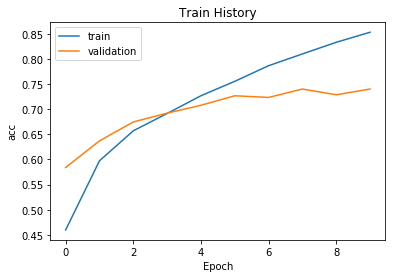

In [42]:
show_train_history(train_history, 'acc', 'val_acc')

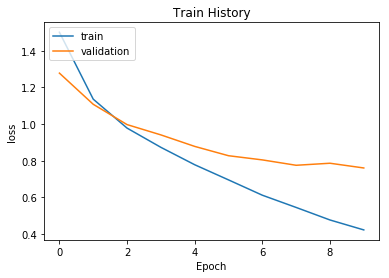

In [43]:
show_train_history(train_history, 'loss', 'val_loss')

In [45]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)

In [47]:
scores[1]

0.7359

In [48]:
prediction = model.predict_classes(x_img_test_normalize)

In [49]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

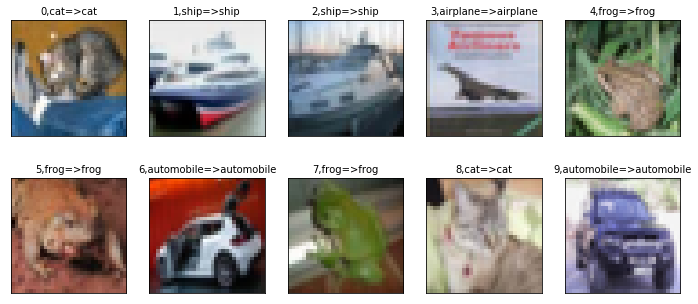

In [50]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [51]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [52]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label:', label_dict[y[i][0]], 'predict', label_dict[prediction[i]])
    
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + ' Probability:{:1.9}'.format(Predicted_Probability[i][j]))

label: cat predict cat


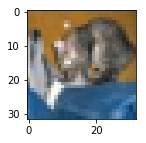

airplane Probability:0.00236856495
automobile Probability:0.00345486519
bird Probability:0.0154681206
cat Probability:0.552589238
deer Probability:0.00413645292
dog Probability:0.384106457
frog Probability:0.0271172896
horse Probability:0.00340668322
ship Probability:0.00631237961
truck Probability:0.00104000478
label: ship predict ship


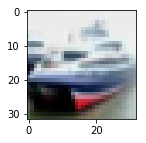

airplane Probability:0.0067905779
automobile Probability:0.140673578
bird Probability:3.74007141e-06
cat Probability:2.64182236e-05
deer Probability:1.58310525e-06
dog Probability:2.45837919e-06
frog Probability:6.88202908e-06
horse Probability:6.75008351e-08
ship Probability:0.851492167
truck Probability:0.00100250659
label: ship predict ship


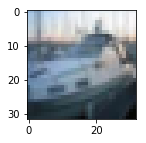

airplane Probability:0.388697892
automobile Probability:0.0425158702
bird Probability:0.00520716282
cat Probability:0.00245674979
deer Probability:0.0157363843
dog Probability:0.00213682675
frog Probability:0.000616203295
horse Probability:0.000869893818
ship Probability:0.525458872
truck Probability:0.0163041893
label: airplane predict airplane


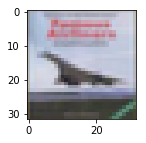

airplane Probability:0.685306966
automobile Probability:0.000423840625
bird Probability:0.0276960805
cat Probability:0.00091205613
deer Probability:0.00256771571
dog Probability:1.97619247e-05
frog Probability:2.76992032e-05
horse Probability:6.26735164e-06
ship Probability:0.282774955
truck Probability:0.000264656323
label: frog predict frog


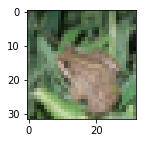

airplane Probability:2.17265082e-07
automobile Probability:5.93725599e-06
bird Probability:0.0337835997
cat Probability:0.0759734064
deer Probability:0.0165696647
dog Probability:3.52199968e-05
frog Probability:0.873597503
horse Probability:2.41481246e-07
ship Probability:3.34874348e-05
truck Probability:6.96270035e-07
label: frog predict frog


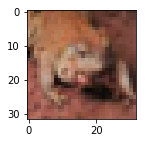

airplane Probability:3.84996456e-05
automobile Probability:4.37489653e-05
bird Probability:0.00167294568
cat Probability:0.00140943076
deer Probability:0.00279356353
dog Probability:0.00368755474
frog Probability:0.989900529
horse Probability:0.000124810846
ship Probability:0.000267174997
truck Probability:6.16894686e-05
label: automobile predict automobile


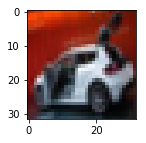

airplane Probability:0.00705081178
automobile Probability:0.965393484
bird Probability:0.00052097271
cat Probability:0.00477216672
deer Probability:0.00011764931
dog Probability:0.00756295584
frog Probability:0.001708225
horse Probability:0.000814212486
ship Probability:0.000149851374
truck Probability:0.0119097056
label: frog predict frog


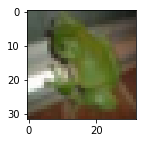

airplane Probability:0.0309518017
automobile Probability:0.000165834907
bird Probability:0.240234196
cat Probability:0.0239634644
deer Probability:0.0300099347
dog Probability:0.00107688108
frog Probability:0.67052716
horse Probability:0.0010791762
ship Probability:0.00156146404
truck Probability:0.00043000275
label: cat predict cat


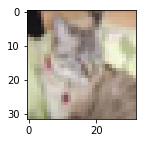

airplane Probability:0.00181575143
automobile Probability:4.93230291e-05
bird Probability:0.0351298265
cat Probability:0.699406326
deer Probability:0.0811633691
dog Probability:0.128972903
frog Probability:0.0411678366
horse Probability:0.0112287831
ship Probability:0.000102768121
truck Probability:0.00096305256
label: automobile predict automobile


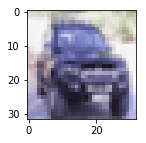

airplane Probability:0.00462762546
automobile Probability:0.713878632
bird Probability:0.000211612671
cat Probability:0.00081876287
deer Probability:0.000264757866
dog Probability:0.00119671936
frog Probability:0.00251672347
horse Probability:5.57784369e-05
ship Probability:0.0793772191
truck Probability:0.19705224


In [57]:
for i in range(10):
    show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, i)

In [58]:
prediction.shape

(10000,)

In [59]:
y_label_test.shape

(10000, 1)

In [60]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [62]:
import pandas as pd

print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['labels'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,807,6,61,11,14,7,11,4,56,23
1,29,808,19,15,6,7,17,1,25,73
2,46,1,713,28,73,55,60,10,8,6
3,19,6,119,454,61,200,107,17,6,11
4,22,2,109,29,703,30,77,21,6,1
5,14,2,77,126,45,661,42,25,4,4
6,3,3,55,30,16,16,875,0,1,1
7,15,0,63,28,68,78,14,730,4,0
8,56,29,31,12,11,11,7,1,827,15


---
# 建立3次的卷積運算神經網路

In [68]:
model = Sequential()

In [69]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [70]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [71]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [72]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=50, batch_size=300, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 269s 7ms/step - loss: 1.8944 - acc: 0.2888 - val_loss: 1.9651 - val_acc: 0.2889
Epoch 2/50
40000/40000 [==============================] - 267s 7ms/step - loss: 1.4586 - acc: 0.4680 - val_loss: 1.3481 - val_acc: 0.5170
Epoch 3/50
40000/40000 [==============================] - 266s 7ms/step - loss: 1.2319 - acc: 0.5541 - val_loss: 1.1545 - val_acc: 0.5876
Epoch 4/50
40000/40000 [==============================] - 267s 7ms/step - loss: 1.0857 - acc: 0.6132 - val_loss: 1.0280 - val_acc: 0.6380
Epoch 5/50
40000/40000 [==============================] - 266s 7ms/step - loss: 0.9875 - acc: 0.6461 - val_loss: 0.9523 - val_acc: 0.6640
Epoch 6/50
40000/40000 [==============================] - 266s 7ms/step - loss: 0.8980 - acc: 0.6803 - val_loss: 0.8554 - val_acc: 0.7000
Epoch 7/50
40000/40000 [==============================] - 268s 7ms/step - loss: 0.8371 - acc: 0.7046 - val_loss: 0.8706 - 

In [75]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)

In [76]:
scores[1]

0.79000000000000004

#### 將訓練週期設定為5次

In [77]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=-.2, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
50000/50000 [==============================] - 383s 8ms/step - loss: 0.4492 - acc: 0.8576
Epoch 2/5
50000/50000 [==============================] - 379s 8ms/step - loss: 0.3787 - acc: 0.8747
Epoch 3/5
50000/50000 [==============================] - 371s 7ms/step - loss: 0.3429 - acc: 0.8868
Epoch 4/5
50000/50000 [==============================] - 369s 7ms/step - loss: 0.3256 - acc: 0.8899
Epoch 5/5
50000/50000 [==============================] - 368s 7ms/step - loss: 0.3020 - acc: 0.8984


In [84]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)

In [85]:
scores[1]

0.7823

In [87]:
model.save_weights('SaveModel/cifarCnnModel.h5')
print('Saved model to disk')

Saved model to disk


In [88]:
try:
    model.load_weights('SaveModel/cifarCnnModel.h5')
    print("OK")
except:
    print("No")

OK


In [90]:
show_train_history(train_history, 'acc', 'val_acc')

KeyError: 'val_acc'

In [92]:
train_history.history

{'acc': [0.85761999998092653,
  0.87470000003814696,
  0.88682000000000005,
  0.88994000001907347,
  0.89835999998092653],
 'loss': [0.44922102102279665,
  0.37867141313552855,
  0.34289868837356569,
  0.32560521103858947,
  0.30199700273513796]}